# Visualizing Japan Covid-19 Data

## Source of Data

This data is from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

## Covid Background

Covid-19 is an infectious disease that was caused by the SARS-CoV-2 virus. It has been a prominant disease since 2019 that has been constantly affecting socieity as a whole. The virus affects everyone differently but is mainly focused on the resperatory system, and makes it much harder for the victim to breath properly. This disease since becoming mainstream is extremely contagious and has the potential to spread to anyone that comes into contact with the victim.

In [1]:
%matplotlib inline
import pandas

## Import Data From S3 Bucket

In [32]:
df = pandas.read_excel('s3://dank-ia241-2022spring1/covid_data.xls')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## List of Countries

In [3]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## The Japan Data

In [4]:
japan_data=df.loc[df['countriesAndTerritories']=='Japan']
japan_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
29726,14/12/2020,14,12,2020,2366,23,Japan,JP,JPN,126860299.0,Asia,25.928522
29727,13/12/2020,13,12,2020,2988,28,Japan,JP,JPN,126860299.0,Asia,25.724360
29728,2020-12-12 00:00:00,12,12,2020,2757,32,Japan,JP,JPN,126860299.0,Asia,25.406688
29729,2020-11-12 00:00:00,11,12,2020,2969,37,Japan,JP,JPN,126860299.0,Asia,25.264799
29730,2020-10-12 00:00:00,10,12,2020,2733,45,Japan,JP,JPN,126860299.0,Asia,24.682269
29731,2020-09-12 00:00:00,9,12,2020,1911,38,Japan,JP,JPN,126860299.0,Asia,23.994899
29732,2020-08-12 00:00:00,8,12,2020,1862,47,Japan,JP,JPN,126860299.0,Asia,23.648060
29733,2020-07-12 00:00:00,7,12,2020,1969,20,Japan,JP,JPN,126860299.0,Asia,24.554569
29734,2020-06-12 00:00:00,6,12,2020,2424,32,Japan,JP,JPN,126860299.0,Asia,23.584211
29735,2020-05-12 00:00:00,5,12,2020,2442,43,Japan,JP,JPN,126860299.0,Asia,23.655155


## Which Month Has Japan Been Affected by Covid Most?

<AxesSubplot:xlabel='month'>

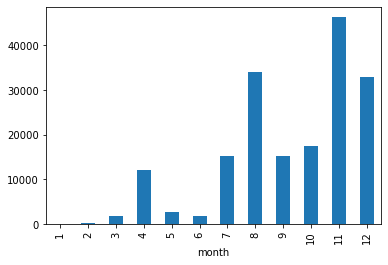

In [56]:
sum_cases_by_month= japan_data.groupby('month').sum()['cases']
sum_cases_by_month.plot.bar()

Based on this visualization, the data shown above is based on the amount of Covid-19 cases that the country of Japan has had over the last 12 months. Here you are able to see that month with the most amount of Covid cases was November with 1.6x the average amount of cases.

## What is the Number of Deaths related to the Number of Cases in Japan over time?

<AxesSubplot:xlabel='cases', ylabel='deaths'>

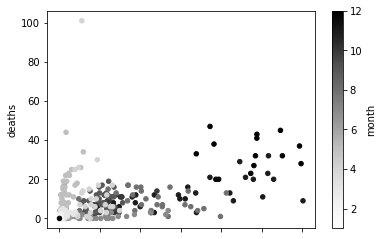

In [58]:
japan_data.plot.scatter(x='cases',y='deaths',c='month')

This graphic demonstrates the amount of death related to the number of Covid-19 cases in Japan. It is demonstrated through the use of colors based by months, the lighter colors being in the begining of the year and the darker ones being later in the year. This graphic also shows that the largest amount of deaths in Japan was in the begining of Covid where there were over 100 deaths.

## Trend of Deaths in Japan from Covid

<AxesSubplot:xlabel='month'>

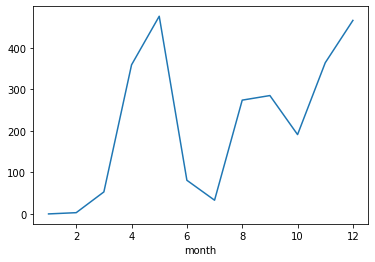

In [61]:
sum_deaths_per_day=japan_data.groupby('month').sum()['deaths']

sum_deaths_per_day.plot()

This graph demonstraights the trend of death that has been caused by Covid-19 over the last 12 months for the country of Japan. It can be seen that May of last year was another huge breakout of Covid-19 deaths in Japan. The graph then falls down again and slowly begins to rise while getting to December. This shows the reader that Covid is still a very prominent thing and is showing signs of slowing down but has not stopped yet.

## Conclusion

In conclusion of my website, it can be easily understood how prominent Covid-19 still is in the country of Japan and how it is still causing deaths even while showing signs of slowing down. Japan was most havily affected by Covid in November of 2021 where it had well over 40,000 cases. In addition to this the number of deaths related to the number of cases is still incresing for the country of japan. Finally from last year over a 12 month peoiod, Japan's population has been suffering from hundreds of deaths a month with it being prominent in May and continously getting worse. The current limitation of my project is that I am not a coding professional, and I am not 100% sure on how to get the data from other years. Another limitation that I have is that there is limited data from out resource so I was not able to find for everything I was looking for. 